# PAPILA dataset: usage example

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import utils

ROOT_DIR = '../'


## Read diagnostic labels

Returns three arrays of size 488: diagnosis label, eye ID and patient ID.

In [2]:
y, eyeID, patID = utils.get_diagnosis(ROOT_DIR)

## Read clinical data

Returns a pandas Data Frame with the clinical data.

In [6]:
df_od, df_os = utils.read_clinical_data(ROOT_DIR)
df_os

ID   Age Gender Diagnosis dioptre_1 dioptre_2 astigmatism Phakic/Pseudophakic  \
#002  47      0         2      -0.5      -1.5          88                   0   
#004  58      1         1       1.5      -2.5          85                   1   
#005  89      1         1      -0.5        -2         100                   1   
#006  69      0         2         1      -1.5          85                   0   
#007  22      1         2     -0.25      -0.5           0                   0   
...   ..    ...       ...       ...       ...         ...                 ...   
#289  64      0         0      0.75      -1.5          93                   1   
#290  75      1         0      0.25     -0.25         160                   1   
#291  55      0         0       1.5     -1.25          76                   0   
#292  56      1         0      1.25     -0.75          79                   0   
#293  39      1         0     -0.75     -0.25         110                   0   

ID   Pneumatic Perkins Pachymetry Axial_Length VF_MD  
#002        20     NaN        603        23.77  0.17  
#004       NaN      19        511        22.96 -6.77  
#005        24      10        575        24.33 -7.44  
#006        22     NaN        593        26.21 -3.31  
#007        13     NaN        NaN        23.35 -2.61  
...        ...     ...        ...          ...   ...  
#289        10     NaN        531        22.31   NaN  
#290        19     NaN        573        22.01   NaN  
#291        14     NaN        443        23.51   NaN  
#292         9     NaN        479        23.84   NaN  
#293        14     NaN        468           24   NaN  

[244 rows x 12 columns]

## Read contours to transform into binary masks

RET195OD_disc_exp1.txt
Mask shape (1934, 2576)


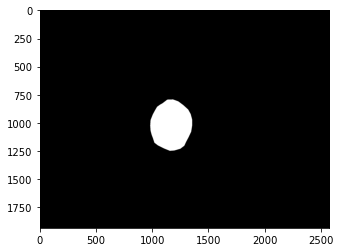

In [33]:
cont = os.listdir(ROOT_DIR + "ExpertsSegmentations/Contours/")[0] # getting file name
print(cont)
img_shape = (1934, 2576, 3) # passing a image shape
# getting mask
mask = utils.contour_to_mask(cont=cont, img_shape=img_shape, abs_path=ROOT_DIR)
print('Mask shape {}'.format(mask.shape))
plt.imshow(mask, cmap='gray') # plotting mask

Visual representation

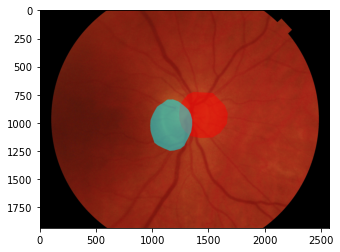

In [8]:
img_name = os.listdir(ROOT_DIR + "FundusImages")[0] # getting image name
img_from_dir = np.array(Image.open(ROOT_DIR + "FundusImages/" + img_name)) # reading image
cont = os.listdir(ROOT_DIR + "ExpertsSegmentations/Contours/") # getting list of countours from dir.
disc = utils.contour_to_mask(cont=cont[0], img_shape=img_shape, abs_path=ROOT_DIR) # getting disc contour
cup = utils.contour_to_mask(cont=cont[2], img_shape=img_shape, abs_path=ROOT_DIR) # getting cup contour
 # applying masks and plotting image
image = utils.apply_mask(image=img_from_dir, mask=cup, color=(1.0, 0.0, 0.0))
image = utils.apply_mask(image=image, mask=disc, color=(0.0, 1.0, 1.0))
plt.imshow(image) 

<h3>Feature engineering</h3>

In [9]:
df_od.Diagnosis.value_counts()

0    170
1     40
2     34
Name: Diagnosis, dtype: int64

In [10]:
df_os.Diagnosis.value_counts()

0    163
1     47
2     34
Name: Diagnosis, dtype: int64

In [11]:
df_test_os = df_os.reset_index().rename({'index':'token_id'},axis = 1)

In [12]:
df_test_os['token_id'] = df_test_os['token_id'].apply(lambda x: 'RET' + x.replace('#','').strip() + 'OS.jpg') 

In [13]:
df_test_os.head()

ID      token_id Age Gender Diagnosis dioptre_1 dioptre_2 astigmatism  \
0   RET002OS.jpg  47      0         2      -0.5      -1.5          88   
1   RET004OS.jpg  58      1         1       1.5      -2.5          85   
2   RET005OS.jpg  89      1         1      -0.5        -2         100   
3   RET006OS.jpg  69      0         2         1      -1.5          85   
4   RET007OS.jpg  22      1         2     -0.25      -0.5           0   

ID Phakic/Pseudophakic Pneumatic Perkins Pachymetry Axial_Length VF_MD  
0                    0        20     NaN        603        23.77  0.17  
1                    1       NaN      19        511        22.96 -6.77  
2                    1        24      10        575        24.33 -7.44  
3                    0        22     NaN        593        26.21 -3.31  
4                    0        13     NaN        NaN        23.35 -2.61

In [14]:
df_test_od = df_od.reset_index().rename({'index':'token_id'},axis = 1)

In [15]:
df_test_od['token_id'] = df_test_od['token_id'].apply(lambda x: 'RET' + x.replace('#','').strip() + 'OD.jpg') 

In [16]:
df_test_od.head()

ID      token_id Age Gender Diagnosis dioptre_1 dioptre_2 astigmatism  \
0   RET002OD.jpg  47      0         2      0.75     -1.75          90   
1   RET004OD.jpg  58      1         1       1.5     -1.75          85   
2   RET005OD.jpg  89      1         1     -0.75     -1.25         101   
3   RET006OD.jpg  69      0         2         1      -1.5          95   
4   RET007OD.jpg  22      1         2     -0.25         0           0   

ID Phakic/Pseudophakic Pneumatic Perkins Pachymetry Axial_Length  VF_MD  
0                    0        21     NaN        586        23.64  -0.07  
1                    0       NaN      19        501        23.06  -3.26  
2                    1        13      14        565        23.81 -14.98  
3                    0        22     NaN        612        26.25  -2.07  
4                    0        14     NaN        NaN        23.39   -2.3

In [17]:
df_join_data = pd.concat([df_test_os,df_test_od])

In [18]:
df_join_data.head()

ID      token_id Age Gender Diagnosis dioptre_1 dioptre_2 astigmatism  \
0   RET002OS.jpg  47      0         2      -0.5      -1.5          88   
1   RET004OS.jpg  58      1         1       1.5      -2.5          85   
2   RET005OS.jpg  89      1         1      -0.5        -2         100   
3   RET006OS.jpg  69      0         2         1      -1.5          85   
4   RET007OS.jpg  22      1         2     -0.25      -0.5           0   

ID Phakic/Pseudophakic Pneumatic Perkins Pachymetry Axial_Length VF_MD  
0                    0        20     NaN        603        23.77  0.17  
1                    1       NaN      19        511        22.96 -6.77  
2                    1        24      10        575        24.33 -7.44  
3                    0        22     NaN        593        26.21 -3.31  
4                    0        13     NaN        NaN        23.35 -2.61

In [19]:
df_join_data.token_id.unique().shape

(488,)

<h3>Retreival img by token id</h3>

In [20]:
df_sample_test = df_join_data.sample(1, random_state=42)

In [21]:
df_sample_test

ID      token_id Age Gender Diagnosis dioptre_1 dioptre_2 astigmatism  \
72  RET105OS.jpg  78      0         1         1      -1.5          80   

ID Phakic/Pseudophakic Pneumatic Perkins Pachymetry Axial_Length VF_MD  
72                   1       NaN      20        563        25.43 -6.75

In [22]:
img_name_test = df_sample_test.token_id.values[0]

In [23]:
img_from_dir_test = np.array(Image.open(ROOT_DIR + "FundusImages/" + img_name_test))

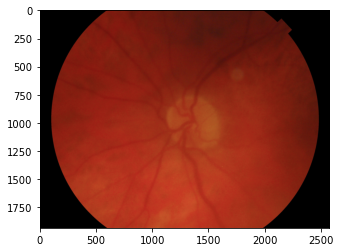

In [24]:
plt.imshow(img_from_dir_test) 

In [62]:
img_from_dir_test.shape

(1934, 2576, 3)

In [25]:
df_sample_test = df_join_data.sample(5, random_state=42)

In [26]:
df_sample_test

ID       token_id Age Gender Diagnosis dioptre_1 dioptre_2 astigmatism  \
72   RET105OS.jpg  78      0         1         1      -1.5          80   
0    RET002OD.jpg  47      0         2      0.75     -1.75          90   
193  RET239OD.jpg  47      1         0       0.5     -0.25          35   
79   RET116OS.jpg  68      1         1      3.75      -1.5          90   
158  RET203OD.jpg  68      0         0      2.25        -2          85   

ID  Phakic/Pseudophakic Pneumatic Perkins Pachymetry Axial_Length  VF_MD  
72                    1       NaN      20        563        25.43  -6.75  
0                     0        21     NaN        586        23.64  -0.07  
193                   0        14     NaN        558        22.33    NaN  
79                    1       NaN      17        NaN        21.05 -10.36  
158                   0        19     NaN        571        23.83    NaN

In [27]:
list_to_tensor = []
for i, row in df_sample_test.iterrows():
    list_to_tensor.append(np.array(Image.open(ROOT_DIR + "FundusImages/" + row['token_id'])))
    
numpy_x_tensor = np.array(list_to_tensor)

In [28]:
numpy_x_tensor.shape

(5, 1934, 2576, 3)

<h3>X and y arrays</h3>

In [72]:
import math
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten,Conv2D,Dropout,AveragePooling2D

2023-07-08 11:01:16.401030: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 11:01:22.832085: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 11:01:22.833760: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 11:01:36.752115: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [29]:
df_join_data.head()

ID      token_id Age Gender Diagnosis dioptre_1 dioptre_2 astigmatism  \
0   RET002OS.jpg  47      0         2      -0.5      -1.5          88   
1   RET004OS.jpg  58      1         1       1.5      -2.5          85   
2   RET005OS.jpg  89      1         1      -0.5        -2         100   
3   RET006OS.jpg  69      0         2         1      -1.5          85   
4   RET007OS.jpg  22      1         2     -0.25      -0.5           0   

ID Phakic/Pseudophakic Pneumatic Perkins Pachymetry Axial_Length VF_MD  
0                    0        20     NaN        603        23.77  0.17  
1                    1       NaN      19        511        22.96 -6.77  
2                    1        24      10        575        24.33 -7.44  
3                    0        22     NaN        593        26.21 -3.31  
4                    0        13     NaN        NaN        23.35 -2.61

In [31]:
df_join_data.to_csv('df_join_data.csv', index=False)

<p>Reminder</p>
<ul>
<li>0, healthy</li>
<li>1, glaucoma</li>
<li>2, suspicious</li>
</ul>

In [30]:
df_join_data.Diagnosis.value_counts()

0    333
1     87
2     68
Name: Diagnosis, dtype: int64

In [77]:
df_join_data.Diagnosis.unique()

array([2, 1, 0], dtype=object)

In [78]:
# based on the test #2, remove suspicious class (2)

df_join_data['Diagnosis'] = df_join_data['Diagnosis'].replace(2,0)

In [80]:
df_join_data.Diagnosis.value_counts()

0    401
1     87
Name: Diagnosis, dtype: int64

In [81]:
list_to_tensor = []
for i, row in df_join_data.iterrows():
    list_to_tensor.append(np.array(Image.open(ROOT_DIR + "FundusImages/" + row['token_id'])))
    
X_train = np.array(list_to_tensor)